# Introduction

<div class="admonition note">
    <p class="admonition-title">Newton's Method</p>
    <p>
    Newton's Methods is used to solve differentiable root-finding and optimization problems, with the following iteration:
        $$
            x_{i+1} = x_i - \frac{f'(x_i)}{f''(x_i)}
        $$
    </p>
</div>

# Code

In [81]:
import numpy as np
import matplotlib.pyplot as plt

In [82]:
def df(f):
    '''
    First derivative of f
    '''
    def eval_at(x):
        shock = 1e-6
        f_up = f(x + 1e-3)
        f_dn = f(x - 1e-3)
        res = (f_up - f_dn) / (2 * shock)
        return res
    return eval_at

def ddf(f):
    '''
    Second derivative of f
    '''
    return df(df(f))

In [83]:
f = lambda x : (x ** 2 - 2) ** 2 # f = (x^2 - 2)^2; to find the square root of 2
x = 1 # initial value
delta = df(f)(x) / ddf(f)(x)

In [84]:
# Newton iterations
iter, xs, deltas = [0], [x], [abs(delta)]
while abs(delta) > 1e-6:    
    x -= delta    

    iter.append(iter[-1] + 1)
    xs.append(x)
    deltas.append(abs(delta))

    delta = df(f)(x) / ddf(f)(x)

display(f'Optimum value found : {x}')
display(f'Theoretical value   : {np.sqrt(2)}')

'Optimum value found : 1.4132151416914993'

'Theoretical value   : 1.4142135623730951'

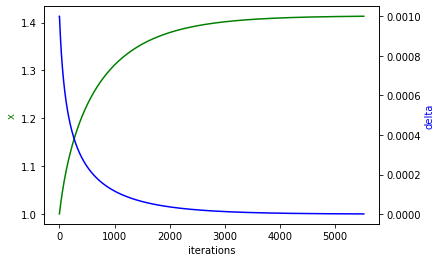

In [85]:
# plot
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(iter, xs, 'g-')
ax2.plot(iter, deltas, 'b-')
ax1.set_xlabel('iterations')
ax1.set_ylabel('x', color='g')
ax2.set_ylabel('delta', color='b')
plt.show()

# Appendix

<details class="tip">
    <summary>Appendix: Proof of decomposition</summary>
    <p><br>First, let's recall conditional probability,<br>
    $$P\left (A|B\right ) = \frac{P\left (A, B\right )}{P\left (B\right )}$$
    The above equation is so derived because of reduction of sample space of $A$ when $B$ has already occured.
    Now, adjusting terms -<br>
    $$P\left (A, B\right ) = P\left (A|B\right )*P\left (B\right )$$
    This equation is called chain rule of probability. Let's generalize this rule for Bayesian Networks. The ordering of names of nodes is such that parent(s) of nodes lie above them (Breadth First Ordering).<br>
    $$P\left (X_1, X_2, X_3, ..., X_n\right ) = P\left (X_n, X_{n-1}, X_{n-2}, ..., X_1\right )\\
    = P\left (X_n|X_{n-1}, X_{n-2}, X_{n-3}, ..., X_1\right ) * P \left (X_{n-1}, X_{n-2}, X_{n-3}, ..., X_1\right ) \left (Chain Rule\right )\\  
    = P\left (X_n|X_{n-1}, X_{n-2}, X_{n-3}, ..., X_1\right ) * P \left (X_{n-1}|X_{n-2}, X_{n-3}, X_{n-4}, ..., X_1\right ) * P \left (X_{n-2}, X_{n-3}, X_{n-4}, ..., X_1\right )$$
    Applying chain rule repeatedly, we get the following equation -<br>
    $$P\left (\bigcap_{i=1}^{n}X_i\right ) = \prod_{i=1}^{n} P\left (X_i | P\left (\bigcap_{j=1}^{i-1}X_j\right )\right )$$
    Keep the above equation in mind. Let's bring back Markov property. To bring some intuition behind Markov property, let's reuse <a href="#bayesian-network-example">Bayesian Network Example</a>. If we say, the student scored very good  <strong>grades</strong>, then it is highly likely the student gets  <strong>acceptance letter </strong> to university. No matter how  <strong>difficult</strong> the class was, how much  <strong>intelligent </strong> the student was, and no matter what his/her  <strong>SAT</strong> score was. The key thing to note here is by  <strong>observing</strong> the node's parent, the influence by  <strong>non-descendants</strong> towards the node gets eliminated. Now, the equation becomes -<br>
    $$P\left (\bigcap_{i=1}^{n}X_i\right ) = \prod_{i=1}^{n} P\left (X_i | Par\left (X_i\right )\right )$$
    Bingo, with the above equation, we have proved  <strong>Factorization Theorem </strong> in Probability.
    </p>
</details>